In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# loading data
data = pd.read_csv(r'https://raw.githubusercontent.com/htsull/Adv-Stat-Learn-Final-Project/main/data/DataBank.csv?token=GHSAT0AAAAAABVOXRBBUL53WJLAKAXZK464YWANSDQ')
print('Data shape:', data.shape)

Data shape: (5000, 23)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  5000 non-null   int64 
 1   Status_Checking_Acc          5000 non-null   object
 2   Duration_in_Months           5000 non-null   int64 
 3   Credit_History               5000 non-null   object
 4   Purposre_Credit_Taken        5000 non-null   object
 5   Credit_Amount                5000 non-null   int64 
 6   Savings_Acc                  5000 non-null   object
 7   Years_At_Present_Employment  5000 non-null   object
 8   Inst_Rt_Income               5000 non-null   int64 
 9   Marital_Status_Gender        5000 non-null   object
 10  Other_Debtors_Guarantors     5000 non-null   object
 11  Current_Address_Yrs          5000 non-null   int64 
 12  Property                     5000 non-null   object
 13  Age                          5000

In [ ]:
data.drop(['Customer_ID', 'Count'], axis=1, inplace=True)

In [25]:
data.columns

Index(['Status_Checking_Acc', 'Duration_in_Months', 'Credit_History',
       'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc',
       'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

In [36]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
y = data.Default_On_Payment
X = data.drop(columns='Default_On_Payment')
X.shape, y.shape

((5000, 20), (5000,))

In [28]:
# hot encoding of the features
X = pd.get_dummies(data.astype(str))
# Normalizing the data
X = normalize(X.values)
# Splitting the data for training and test purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= .3)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3500, 1077), (3500,), (1500, 1077), (1500,))

In [50]:
from helper import model_accuracy

In [54]:
def model_accuracy(model):
    """Perform the fitting, print out the accuracy, classification report and confusion matrix with the given model

    Args:
        model(string) : model to perform. 'rf' : random forest, 'xgb' : XGBoost, 'knn' : K-Nearest Neighbors.

    Returns:
        classifier: model fit to the train set.
    """
    if model == 'rf':
        print("Random forest model")
        # fitting 
        model_rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
        # Predictions (test)
        predictions_test = model_rf.predict(X_test)
        model_rf_score = model_rf.score(X_test, y_test)
        print('Base model accuracy  : {:04.3f}'.format(model_rf_score))
        print("=========================================================================")
        print("Classification report : ")
        print(classification_report(y_test, predictions_test, digits=3, zero_division = 1)),
        disp = plot_confusion_matrix(model_rf, X_test, y_test, cmap='Reds', values_format='d',
                                    #  display_labels=labels_disp,
                                    xticks_rotation= 'vertical')
        print("=========================================================================")
        print("Confusion matrix : ")
        return model_rf
    
    elif model == 'xgb':
        print("Extreme gradient boosting model")
        # fitting 
        model_xgb = GradientBoostingClassifier().fit(X_train, y_train)
        print("=========================================================================")
        model_xgb_score = model_xgb.score(X_test, y_test)
        print("Fitting to the train set : {:04.2f}".format(model_xgb_score))
        # Predictions (test)
        print("=========================================================================")
        predictions_test = model_xgb.predict(X_test)
        print('Base model accuracy  : {:04.3f}'.format(model_xgb.score(X_test, y_test)))
        print("=========================================================================")
        print("Classification report : ")
        print(classification_report(y_test, predictions_test, digits=3, zero_division = 1)),
        disp = plot_confusion_matrix(model_xgb, X_test, y_test, cmap='Reds', values_format='d',
                                    #  display_labels=labels_disp,
                                    xticks_rotation= 'vertical')
        print("=========================================================================")
        print("Confusion matrix : ")
        return model_xgb
    
    elif model == 'knn':
        print("K-Nearest Neighbors model")
        # fitting 
        model_knn = KNeighborsClassifier().fit(X_train, y_train)
        predictions_test = model_knn.predict(X_test)
        model_knn_score = model_knn.score(X_test, y_test)
        print("=========================================================================")
        print("Fitting to the train set : {:04.2f}".format(model_knn_score))
        # Predictions (test)
        print("=========================================================================")
        print('Base model accuracy  : {:04.3f}'.format(model_knn_score))
        print("=========================================================================")
        print("Classification report : ")
        print(classification_report(y_test, predictions_test, digits=3, zero_division = 1)),
        disp = plot_confusion_matrix(model_knn, X_test, y_test, cmap='Reds', values_format='d',
                                    #  display_labels=labels_disp,
                                    xticks_rotation= 'vertical')
        print("=========================================================================")
        print("Confusion matrix : ")
        return model_knn
    
    elif model == 'lda':
        print("Linear Discriminant Ananlysis model (LDA)")
        # fitting 
        model_lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
        predictions_test = model_lda.predict(X_test)
        model_lda_score = model_lda.score(X_test, y_test)
        print('Base model accuracy  : {:04.3f}'.format(model_lda_score))
        print("=========================================================================")
        print("Classification report : ")
        print(classification_report(y_test, predictions_test, digits=3, zero_division = 1)),
        disp = plot_confusion_matrix(model_lda, X_test, y_test, cmap='Reds', values_format='d',
                                    #  display_labels=labels_disp,
                                    xticks_rotation= 'vertical');
        print("=========================================================================")
        print("Confusion matrix : ")
        return model_lda
    
    else :
        print("Enter a valid choice.")

Extreme gradient boosting model
Fitting to the train set : 1.00
Base model accuracy  : 1.000
Classification report : 
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1039
           1      1.000     1.000     1.000       461

    accuracy                          1.000      1500
   macro avg      1.000     1.000     1.000      1500
weighted avg      1.000     1.000     1.000      1500

Confusion matrix : 


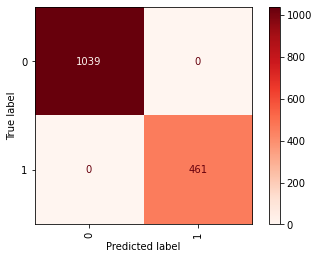

In [53]:
model_XGB = model_accuracy('xgb')

K-Nearest Neighbors model
Fitting to the train set : 0.98
Base model accuracy  : 0.978
Classification report : 
              precision    recall  f1-score   support

           0      0.977     0.991     0.984      1039
           1      0.980     0.948     0.964       461

    accuracy                          0.978      1500
   macro avg      0.979     0.970     0.974      1500
weighted avg      0.978     0.978     0.978      1500

Confusion matrix : 


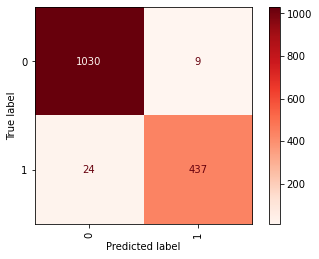

In [55]:
model_knn = model_accuracy('knn')

Random forest model
Base model accuracy  : 1.000
Classification report : 
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1039
           1      1.000     1.000     1.000       461

    accuracy                          1.000      1500
   macro avg      1.000     1.000     1.000      1500
weighted avg      1.000     1.000     1.000      1500

Confusion matrix : 


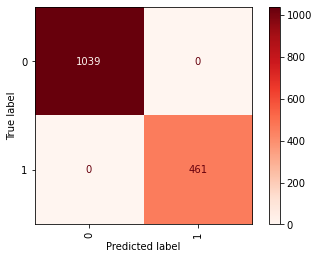

In [42]:
model_rf = model_accuracy('rf')

Linear Discriminant Ananlysis model (LDA)
Base model accuracy  : 1.000
Classification report : 
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1039
           1      1.000     1.000     1.000       461

    accuracy                          1.000      1500
   macro avg      1.000     1.000     1.000      1500
weighted avg      1.000     1.000     1.000      1500

Confusion matrix : 


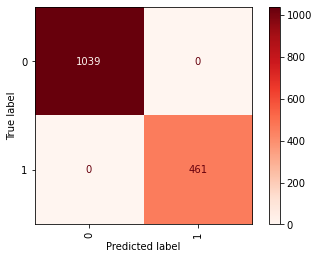

In [46]:
model_lda = model_accuracy('lda')